# Exercise 6

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [3]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


## 1. Tokenize the data

In [4]:
# answer here
review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

binary_rating = [1 if r >= 4 else 0 for r in rating]

# Separate out the review and rating into training and test sets
training_size = int(len(review) * 0.8)

training_review = review[0:training_size]
testing_review = review[training_size:]
training_rating = binary_rating[0:training_size]
testing_rating = binary_rating[training_size:]

# Make rating into numpy arrays for use with the network later
training_rating_final = np.array(training_rating)
testing_rating_final = np.array(testing_rating)

In [5]:
vocab_size = 5000
embedding_dim = 32
max_length = 50
padding_type = 'post'
truncating_type = 'post'
oov_tok = "<OOV>"

## 2. Sequence the data

In [6]:
# answer here
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_review)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_review)
testing_sequences = tokenizer.texts_to_sequences(testing_review)

## 3. Pad the data

In [7]:
# answer here
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

print(tokenizer.word_index)

{'<OOV>': 1, 'the': 2, 'na': 3, 'i': 4, 'ko': 5, 'sa': 6, 'yung': 7, 'and': 8, 'ang': 9, 'ng': 10, 'it': 11, 'lang': 12, 'is': 13, 'at': 14, 'you': 15, 'seller': 16, 'naman': 17, 'to': 18, 'for': 19, 'not': 20, 'po': 21, 'sya': 22, 'maganda': 23, 'order': 24, 'pa': 25, 'but': 26, 'thank': 27, 'pero': 28, 'a': 29, 'good': 30, 'item': 31, 'product': 32, 'hindi': 33, 'so': 34, 'sana': 35, 'my': 36, 'ung': 37, 'dumating': 38, 'this': 39, 'ok': 40, 'delivery': 41, 'di': 42, 'was': 43, 'din': 44, 'its': 45, 'may': 46, 'quality': 47, 'in': 48, 'color': 49, 'price': 50, 'working': 51, 'very': 52, 'of': 53, 'ako': 54, 'ganda': 55, 'that': 56, 'me': 57, 'lng': 58, 'well': 59, 'buy': 60, 'with': 61, 'size': 62, 'mga': 63, 'fast': 64, 'as': 65, 'nice': 66, 'nyo': 67, 'will': 68, 'time': 69, 'nya': 70, 'siya': 71, '1': 72, 'black': 73, 'just': 74, 'items': 75, 'lazada': 76, 'thanks': 77, 'kasi': 78, 'are': 79, 'okay': 80, 'much': 81, 'kaso': 82, 'nmn': 83, 'on': 84, 'kaya': 85, '2': 86, 'kung': 87,

## 4. Train a sentiment model

In [8]:
# answer here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
num_epochs = 50
history = model.fit(
    training_padded, training_rating_final, epochs=num_epochs,
    validation_data=(testing_padded, testing_rating_final)
    )

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5378 - loss: 0.6906 - val_accuracy: 0.2139 - val_loss: 0.7501
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5425 - loss: 0.6865 - val_accuracy: 0.2139 - val_loss: 0.7745
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6012 - loss: 0.6721 - val_accuracy: 0.2139 - val_loss: 0.7731
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5890 - loss: 0.6675 - val_accuracy: 0.2139 - val_loss: 0.7499
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5635 - loss: 0.6666 - val_accuracy: 0.2139 - val_loss: 0.7652
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5898 - loss: 0.6555 - val_accuracy: 0.2537 - val_loss: 0.7284
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6604 - loss: 0.6267 - val_accuracy: 0.3383 - val_loss: 0.7187
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7191 - loss: 0.6035 - val_accuracy: 0.4975 - val_loss

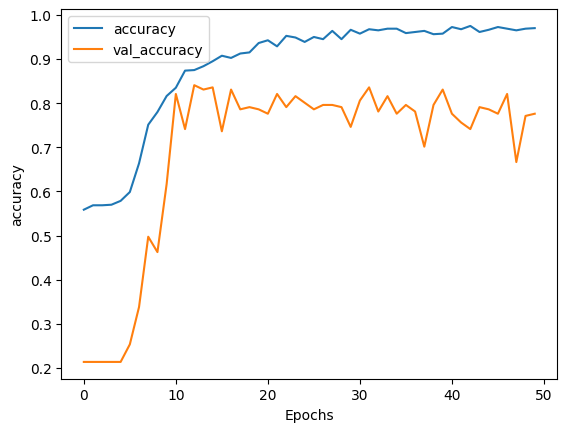

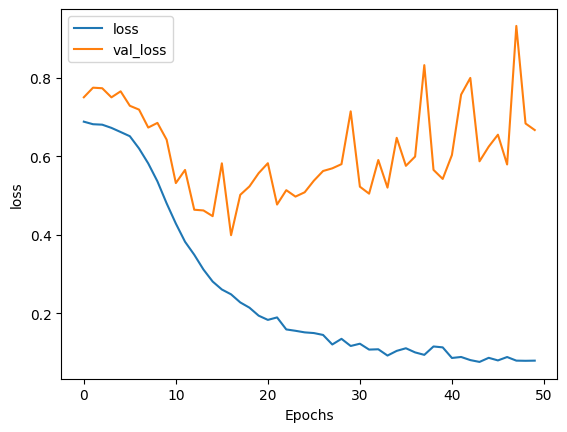

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualing the network

In [11]:
# answer here
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5000, 32)


In [12]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Iterate through the available word numbers in the reverse word index
for word_num in reverse_word_index.keys():
  # Skip the OOV token if you don't want to include it
  if word_num == 1 and reverse_word_index[word_num] == "<OOV>":
      continue
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [13]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [14]:
# answer here
fake_ratings = ['bobo ang bts',
                'sayang talaga kulang nang parts',
                'basta seventeen parin']

print(fake_ratings)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_ratings)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\n Bakit magchatgpt pa eto ang better na ratings.! \n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_ratings)):
  print(fake_ratings[x])
  print(classes[x])
  print('\n')

['bobo ang bts', 'sayang talaga kulang nang parts', 'basta seventeen parin']

 Bakit magchatgpt pa eto ang better na ratings.! 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
bobo ang bts
[0.37930062]


sayang talaga kulang nang parts
[0.01687654]


basta seventeen parin
[0.31480378]


